In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pydataset
import scipy.stats


In [23]:
dataset = pd.read_csv("SraRunInfo.csv")

# Characterizing data labeled with the serotypes

In [35]:
# Partition of the data according to serotype
non_labeled = dataset[(dataset.ScientificName == "Dengue virus") | (dataset.ScientificName == "Orthoflavivirus denguei")] 
type1 = dataset[(dataset.ScientificName == "dengue virus type 1") | (dataset.ScientificName == "dengue virus type I")]
type2 = dataset[(dataset.ScientificName == "dengue virus type 2") | (dataset.ScientificName == "Dengue virus type I") | (dataset.ScientificName == "Dengue virus 2 16681-PDK53")]
type3 = dataset[dataset.ScientificName == "dengue virus type 3"]
type4 = dataset[dataset.ScientificName == "dengue virus type 4"]
labeled = dataset[(dataset.ScientificName != "Dengue virus") & (dataset.ScientificName != "Orthoflavivirus denguei")]

non_labeled_length = non_labeled.shape[0]
type1_length = type1.shape[0]
type2_length = type2.shape[0]
type3_length = type3.shape[0]
type4_length = type4.shape[0]
labeled_length = type1_length +  type2_length + type3_length + type4_length
print("Number of samples: " + str(non_labeled_length + labeled_length) + ", representing " + str(sum(dataset["size_MB"])/1000) +" Gb of data (.sra)")
print("I) Number of samples non labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(non_labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("II) Number of samples labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 1: " + str(type1_length) + ", representing " + str(sum(type1["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 2: " + str(type2_length) + ", representing " + str(sum(type2["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 3: " + str(type3_length) + ", representing " + str(sum(type3["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 4: " + str(type4_length) + ", representing " + str(sum(type4["size_MB"])/1000) +" Gb of data (.sra)")

Number of samples: 9884, representing 2163.144 Gb of data (.sra)
I) Number of samples non labeled with serotype: 9146, representing 1956.73 Gb of data (.sra)
II) Number of samples labeled with serotype: 9146, representing 206.414 Gb of data (.sra)
    - Number of samples labeled as type 1: 284, representing 94.118 Gb of data (.sra)
    - Number of samples labeled as type 2: 304, representing 29.624 Gb of data (.sra)
    - Number of samples labeled as type 3: 136, representing 70.166 Gb of data (.sra)
    - Number of samples labeled as type 4: 14, representing 1.248 Gb of data (.sra)


Text(0.5, 1.0, 'Proportion of samples labeled with serotypes')

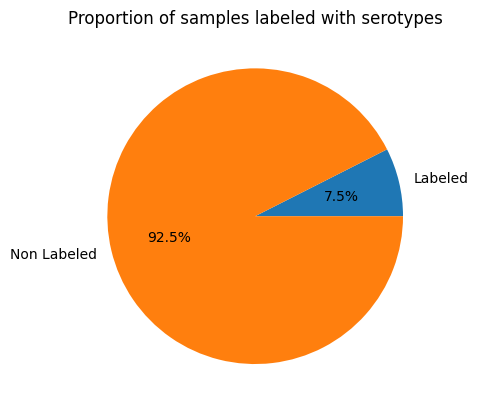

In [36]:

labels = 'Labeled', 'Non Labeled'
sizes = [labeled_length, non_labeled_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with serotypes")

Text(0.5, 1.0, 'Proportion of data (in format .sra) labeled with serotypes')

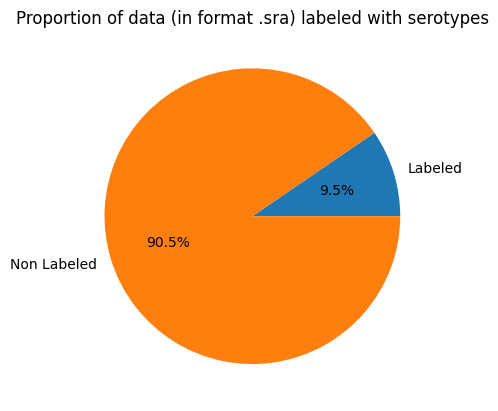

In [37]:
labels = 'Labeled', 'Non Labeled'
sizes = [sum(labeled["size_MB"]), sum(non_labeled["size_MB"])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (in format .sra) labeled with serotypes")


Text(0.5, 1.0, 'Proportion of data labeled with each serotypes')

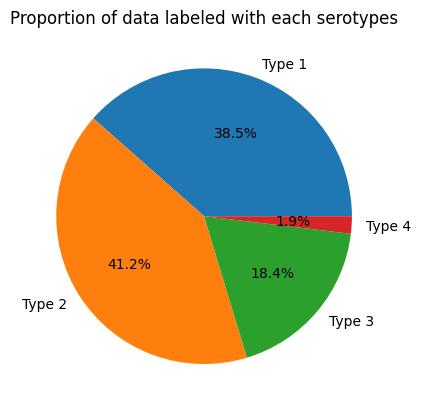

In [30]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [type1_length, type2_length, type3_length, type4_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with each serotypes")

Text(0.5, 1.0, 'Proportion of data (.sra) labeled with each serotypes')

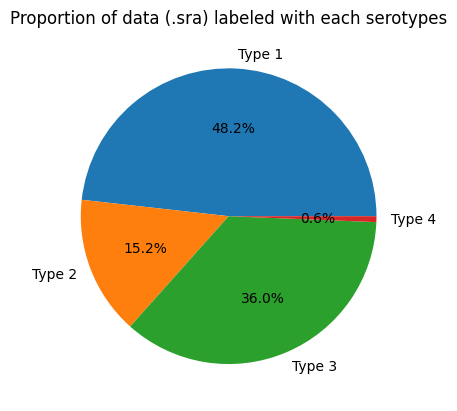

In [38]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [sum(type1["size_MB"])/1000, sum(type2["size_MB"])/1000, sum(type3["size_MB"])/1000, sum(type4["size_MB"])/1000]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (.sra) labeled with each serotypes")

In [17]:
print("Number of distinct studies " + str(len(dataset["SRAStudy"].unique())))
dataset["SRAStudy"].value_counts()

Number of distinct projects 82


SRAStudy
SRP202294    2786
SRP487774    1192
SRP450554     920
SRP430629     690
SRP474537     492
             ... 
SRP338207       2
SRP319773       2
SRP237710       2
SRP560131       2
SRP497892       2
Name: count, Length: 82, dtype: int64

ProjectID
0          2786
1072696    1192
973096      920
951702      690
1045842     492
           ... 
765316        2
729800        2
595927        2
1216219       2
1052714       2
Name: count, Length: 82, dtype: int64